# Studying Sparse - Dense retrieval

This notebook studies **sparse - dense retrieval** using [scifact](https://github.com/allenai/scifact) dataset.

In [1]:
DATASET = 'scifact'

Downloading dataset

In [2]:
from assignment2.model import BEIRDatasetDownload

downloader = BEIRDatasetDownload(data_name=DATASET)
downloader.download()

## 1. Vectorization

We use a own-built vectorizer class to parse docuements and queries and perform both sparse and dense vectorization.

In [2]:
from assignment2.model import DocumentVectorizer

In [3]:
vectorizer = DocumentVectorizer(data_name=DATASET)

### 1.1 Parsing

Parsing documents and queries:

In [4]:
%%time
vectorizer.parse()

Parsing documents
Parsing queries
Wall time: 470 ms


Document example:

In [5]:
vectorizer.documents[0].content

'Alterations of the architecture of cerebral white matter in the developing human brain can affect cortical development and result in functional disabilities. A line scan diffusion-weighted magnetic resonance imaging (MRI) sequence with diffusion tensor analysis was applied to measure the apparent diffusion coefficient, to calculate relative anisotropy, and to delineate three-dimensional fiber architecture in cerebral white matter in preterm (n = 17) and full-term infants (n = 7). To assess effects of prematurity on cerebral white matter development, early gestation preterm infants (n = 10) were studied a second time at term. In the central white matter the mean apparent diffusion coefficient at 28 wk was high, 1.8 microm2/ms, and decreased toward term to 1.2 microm2/ms. In the posterior limb of the internal capsule, the mean apparent diffusion coefficients at both times were similar (1.2 versus 1.1 microm2/ms). Relative anisotropy was higher the closer birth was to term with greater a

Query example:

In [6]:
vectorizer.queries[0].content

'0-dimensional biomaterials lack inductive properties.'

### 1.2 Tokenization

Performing tokenization:
- removing punctuation
- lowercase
- stop-words removal
- removing numerics and west asia chars
- stemming and lemming

In [7]:
%%time
vectorizer.tokenize()

Tokenizing documents
Tokenizing queries
Wall time: 20.3 s


Tokenized document example:

In [8]:
vectorizer.documents[0].tokenized_content

'alter architectur cerebr white matter develop human brain affect cortic develop result function disabl line scan diffusionweight magnet reson imag mri sequenc diffus tensor analysi appli measur appar diffus coeffici calcul relat anisotropi delin threedimension fiber architectur cerebr white matter preterm n fullterm infant n ass effect prematur cerebr white matter develop earli gestat preterm infant n studi second time term central white matter mean appar diffus coeffici wk high decreas toward term posterior limb intern capsul mean appar diffus coeffici time similar versus relat anisotropi higher closer birth term greater absolut valu intern capsul central white matter preterm infant term show higher mean diffus coeffici central white matter versus p lower relat anisotropi area compar fullterm infant white matter versus p intern capsul versus p nonmyelin fiber corpus callosum visibl diffus tensor mri earli wk fullterm preterm infant term show mark differ white matter fiber organ data 

Query example:

In [9]:
vectorizer.queries[0].tokenized_content

'biomateri lack induct properti'

### 1.3 Sparse vectorization

Sparse vectorization of documents and queries

In [10]:
%%time
vectorizer.sparse_vectorize()

Learning vocabulary idf 
Generating document sparse vector 
Generating query sparse vector 
Wall time: 740 ms


In [11]:
vectorizer.sparse_document_vectors.shape

(5183, 27747)

In [12]:
vectorizer.sparse_query_vectors.shape

(1109, 27747)

We have a total of **27747** different terms.

### 1.4 Dense vectorization

Dense vectorization of documents and queries:

In [13]:
%%time
vectorizer.dense_vectorize()

Generating document dense vector 
Generating query dense vector 
Wall time: 8min 22s


In [14]:
vectorizer.dense_document_vectors.shape

(5183, 384)

In [15]:
vectorizer.dense_query_vectors.shape

(1109, 384)

### 1. 5 Saving

We store vectors to disk in order to maintain vectors available without need to process them again

In [16]:
vectorizer.save()

## 2. Computing scores

We use a own-built vectorizer class compute **sparse scorse**, **dense scores** and **full scores** for each query.

We exploit results coming from previous computations

In [17]:
from assignment2.model import ScoresComputation

In [18]:
%%time
scores = ScoresComputation(data_name=DATASET)

Wall time: 172 ms


### 2.1 Computing sparse scores

Sparse scores:

In [19]:
scores.sparse_scores

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04012003],
       [0.        , 0.01455134, 0.01119865, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00811839, 0.        , ..., 0.06786625, 0.        ,
        0.        ],
       [0.        , 0.00924799, 0.        , ..., 0.        , 0.01074046,
        0.02184498],
       [0.        , 0.04729601, 0.04192406, ..., 0.        , 0.        ,
        0.        ]])

### 2.2 Computing dense scores

Dense scores:

In [20]:
scores.dense_scores

array([[ 0.13090013,  0.07492754,  0.10078447, ...,  0.13229598,
        -0.03334123, -0.03273798],
       [ 0.00847887, -0.00729703,  0.02062898, ..., -0.06810959,
         0.11296998,  0.09180941],
       [-0.01727739,  0.15201274,  0.08397648, ...,  0.05842264,
         0.12578289,  0.18425739],
       ...,
       [ 0.07990413,  0.34700558,  0.22536   , ...,  0.23869547,
         0.00883653,  0.24043134],
       [ 0.0417736 ,  0.18761076,  0.14705925, ...,  0.15449703,
         0.00458496,  0.2149534 ],
       [ 0.1182021 ,  0.2641113 ,  0.09837074, ...,  0.10861366,
         0.14071329,  0.18277472]], dtype=float32)

### 2.3 Computing full scores

Full scores are actually the sum of the previous two results

In [21]:
scores.full_scores

array([[ 0.13090013,  0.07492754,  0.10078447, ...,  0.13229598,
        -0.03334123, -0.03273798],
       [ 0.00847887, -0.00729703,  0.02062898, ..., -0.06810959,
         0.11296998,  0.13192944],
       [-0.01727739,  0.16656408,  0.09517513, ...,  0.05842264,
         0.12578289,  0.18425739],
       ...,
       [ 0.07990413,  0.35512396,  0.22536001, ...,  0.30656173,
         0.00883653,  0.24043134],
       [ 0.0417736 ,  0.19685875,  0.14705925, ...,  0.15449703,
         0.01532542,  0.23679837],
       [ 0.1182021 ,  0.31140732,  0.1402948 , ...,  0.10861366,
         0.14071329,  0.18277472]])

### 1.4 Saving

We store scores to disk:

In [22]:
scores.save()

## 3. Top-K analysis of recall

We use two own-built classes for recall evaluation and analysis

In [23]:
from assignment2.model import RecallEvaluation, RecallAnalysis

### 3.1 Choise of K

Top-k is actually an hyperparameter of the model. We study a possible different behaviour varying the number of relevant documents we consider.

In [24]:
K = [3, 10, 50, 100, 500, 1000]

### 3.2 Evaluation

We study recall trend incrementing the value of **k'**, the number of documents with highest score considering sparse and dense scores alone. Iterations stop when 100% recall is reached.

We consider 90% recall enough: in the plot we also highlight k' value to reach at least 0.9 recall.

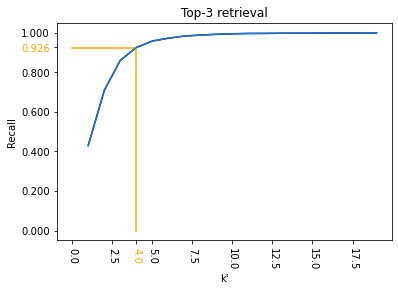

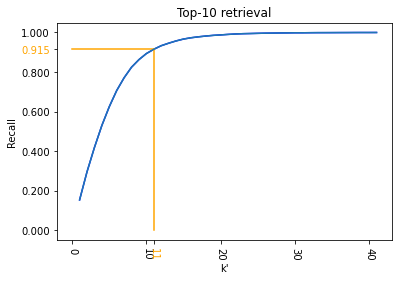

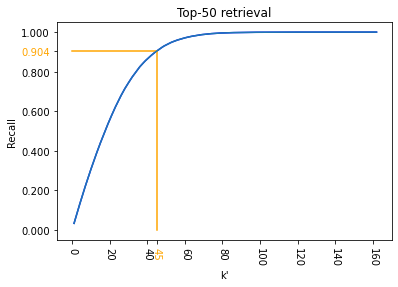

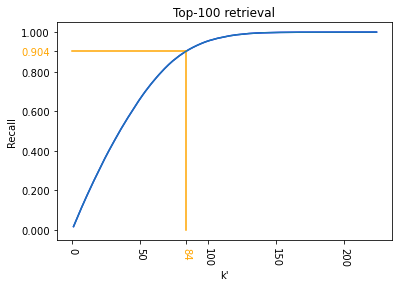

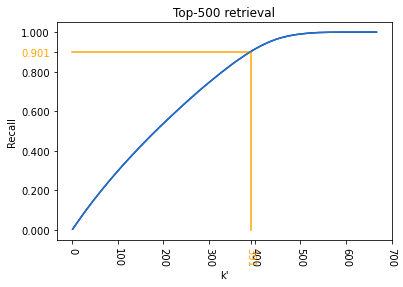

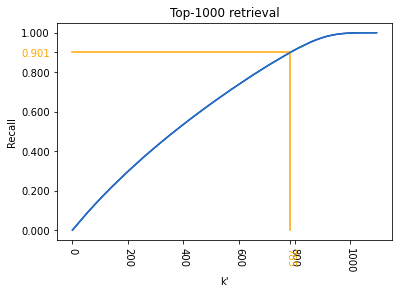

In [25]:
for k in K:
    rec_eval = RecallEvaluation(data_name=DATASET, k=k)
    rec_eval.evaluate()
    rec_eval.plot(save=True)
    rec_eval.save()

### 3.3 Studying interaction between k' and recall

We exploit previous results to study the interaction between **k'** and **recall** in different models (with fixed k)

In [26]:
ra = RecallAnalysis(data_name=DATASET)

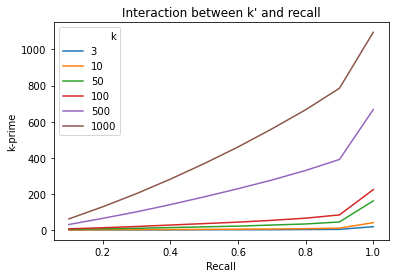

In [27]:
ra.plot(save=True)